In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_context('talk', font_scale=2)
sns.set_style('white')
%matplotlib inline

# Who is busy?

To find out, I pulled some data from a 2008 survey of doctors funded by RWJF:

In [2]:
df = pd.read_csv('data/doctors.csv')
df.head()

,id,age,sex,race,specialty,weeks_per_year,hours_per_week,it_use,minority_health_cme,survey_weight
0,500001,55,M,White,Medical Specialties,45,41,Available and used,1,82.630155
1,500002,65,M,White,Surgical Specialties,50,60,Not available,0,74.170794
2,500003,60,M,White,Medical Specialties,45,55,Available and used,0,88.704486
3,500004,40,F,Black,Internal Medicine,49,60,Available and used,1,103.870154
4,500005,35,M,White,Family/GP,48,50,Available and used,1,78.126163


In [3]:
# simple average
df.groupby('specialty').hours_per_week.mean().round(2)

specialty
Family/GP               49.13
Internal Medicine       51.36
Medical Specialties     52.85
Ob/Gyn                  53.75
Pediatrics              44.96
Psychiatry              45.41
Surgical Specialties    53.01
Name: hours_per_week, dtype: float64

In [4]:
# more statistically responsible approach that uses survey weights

def weighted_mean(df, col):
    return np.sum(df[col] * df.survey_weight) / df.survey_weight.sum()

# test by comparing simple mean to weighted mean
print('  simple mean = ', df.hours_per_week.mean())
print('weighted mean = ', weighted_mean(df, 'hours_per_week'))

  simple mean =  50.8779661017
weighted mean =  51.0456104589


In [5]:
df.groupby('specialty').apply(weighted_mean, col='hours_per_week').round(2).sort_values()

specialty
Pediatrics              45.16
Psychiatry              45.41
Family/GP               49.13
Internal Medicine       51.41
Medical Specialties     52.94
Surgical Specialties    53.15
Ob/Gyn                  54.03
dtype: float64

You docs work a lot! And it doesn't get better when you get older:

In [6]:
sns.set_context('talk', font_scale=2)

In [7]:
plt.xkcd()

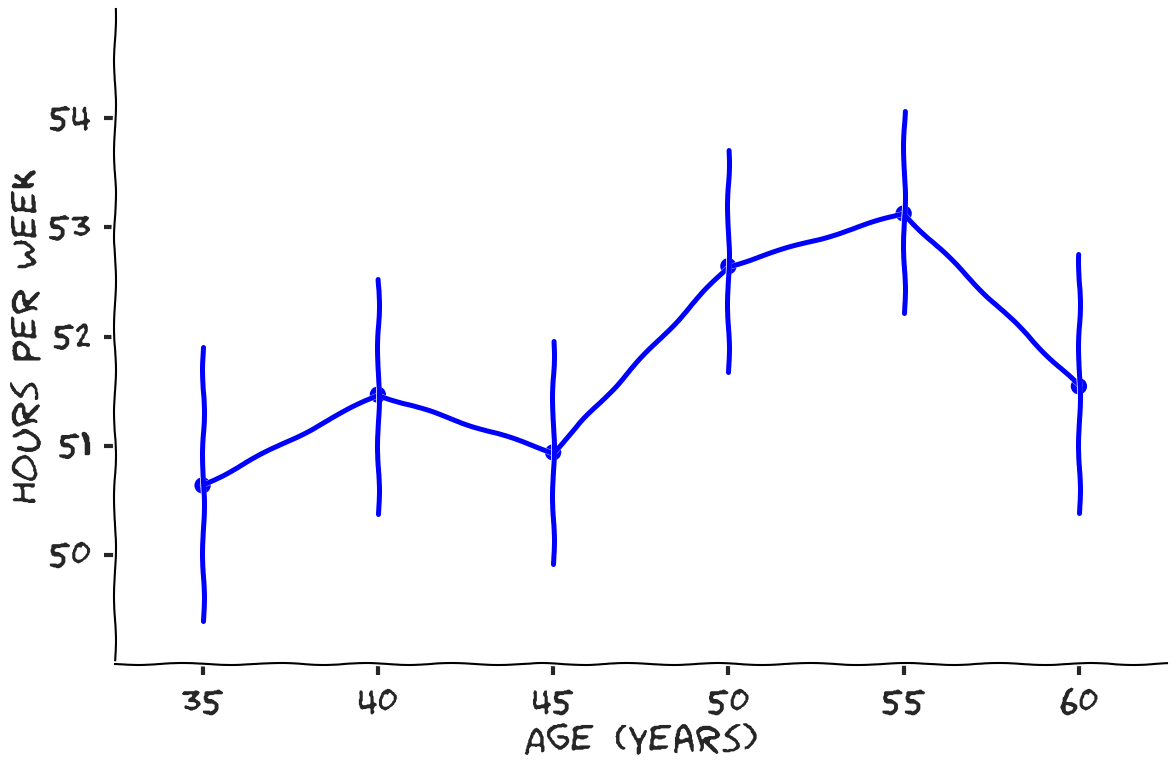

In [8]:
#df.groupby('age').apply(weighted_mean, col='hours_per_week').plot(marker='o')

sns.factorplot(data=df.query('age < 65'), x='age', y='hours_per_week', aspect=1.5, size=8, kind='point')

plt.ylabel('Hours per Week') #, rotation=0, ha='right')
#plt.axis(ymin=50, ymax=54)
plt.xlabel('Age (years)')
plt.yticks(range(50,55))
#plt.title('Older Doctors are Even Busier')
#plt.subplots_adjust(left=.4)
plt.savefig('img/busy_old_docs.png')

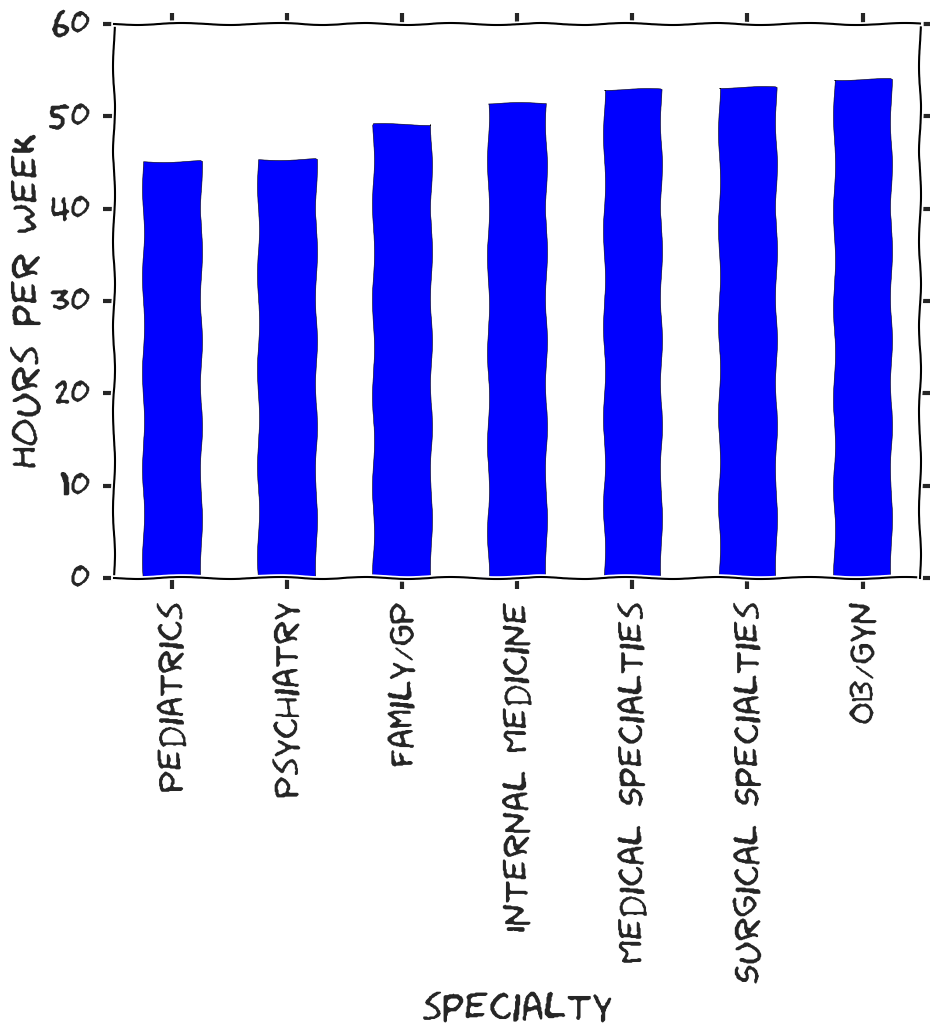

In [9]:
t = df.groupby('specialty').apply(weighted_mean, col='hours_per_week')
t = t.sort_values()
t.plot(kind='bar')
plt.ylabel('Hours per Week');

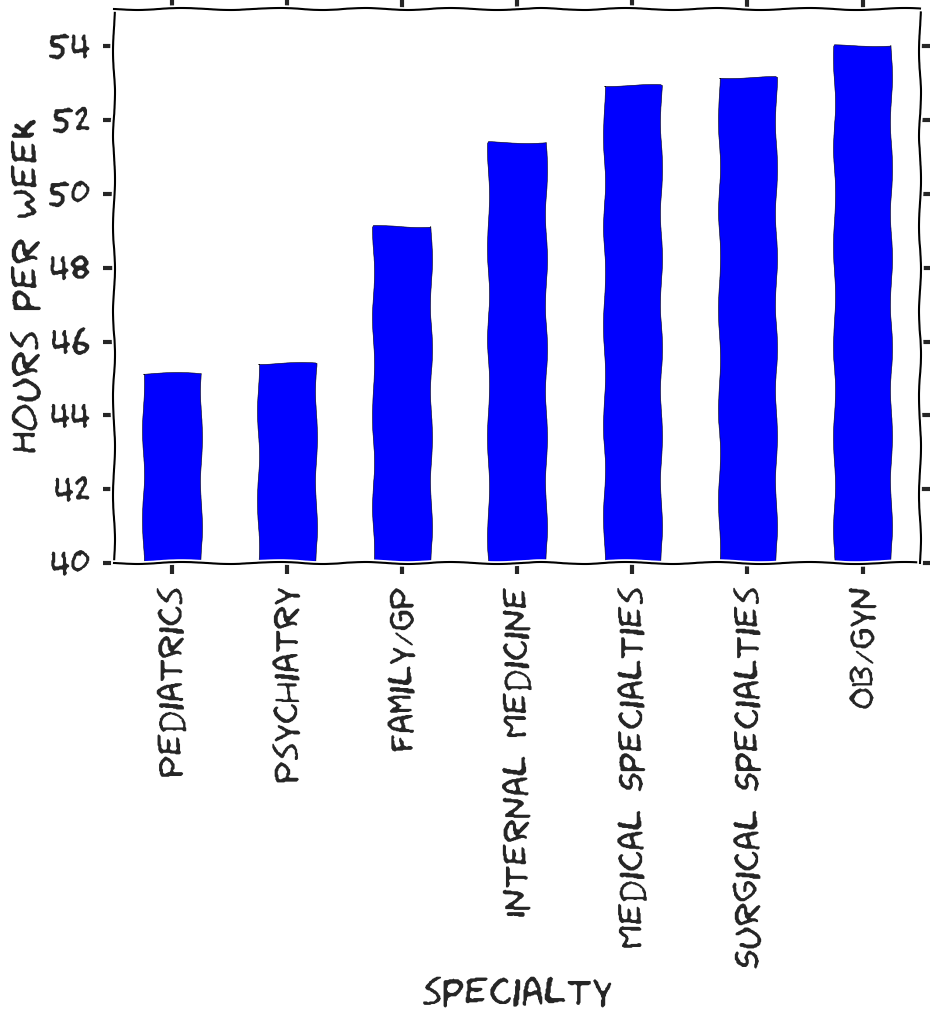

In [10]:
t.plot(kind='bar')
plt.axis(ymin=40, ymax=55)
plt.ylabel('Hours per Week');

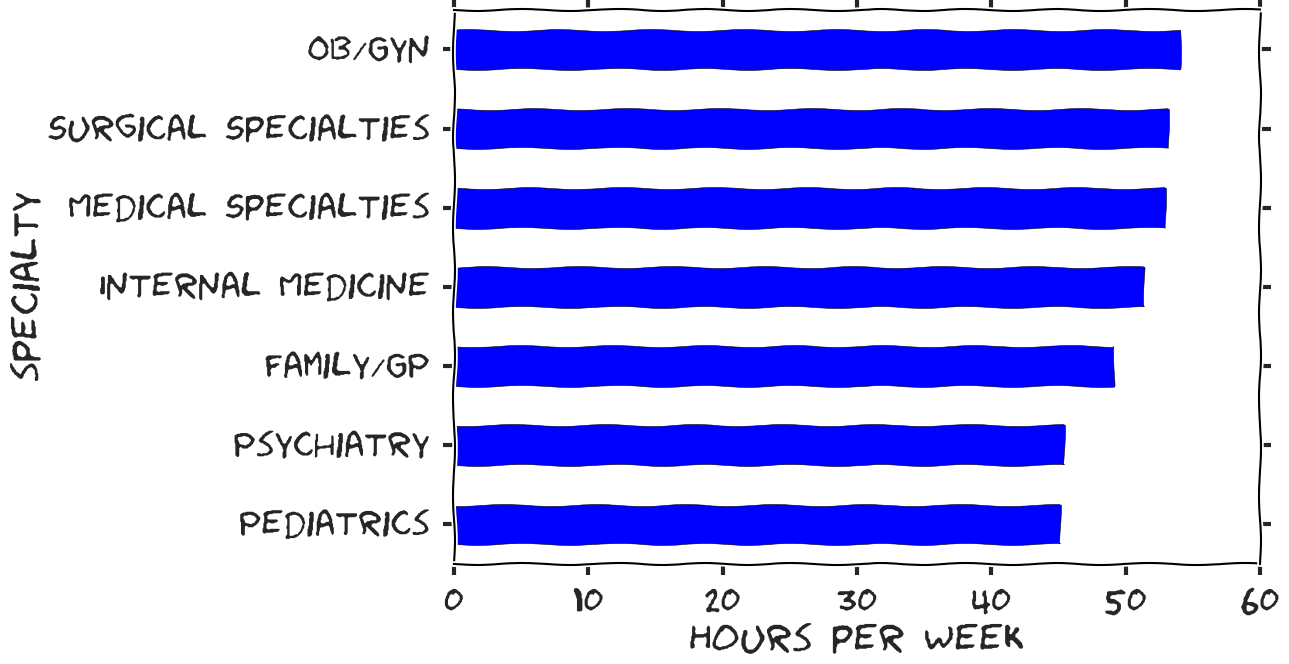

In [11]:
t.plot(kind='barh')
plt.xlabel('Hours per Week');

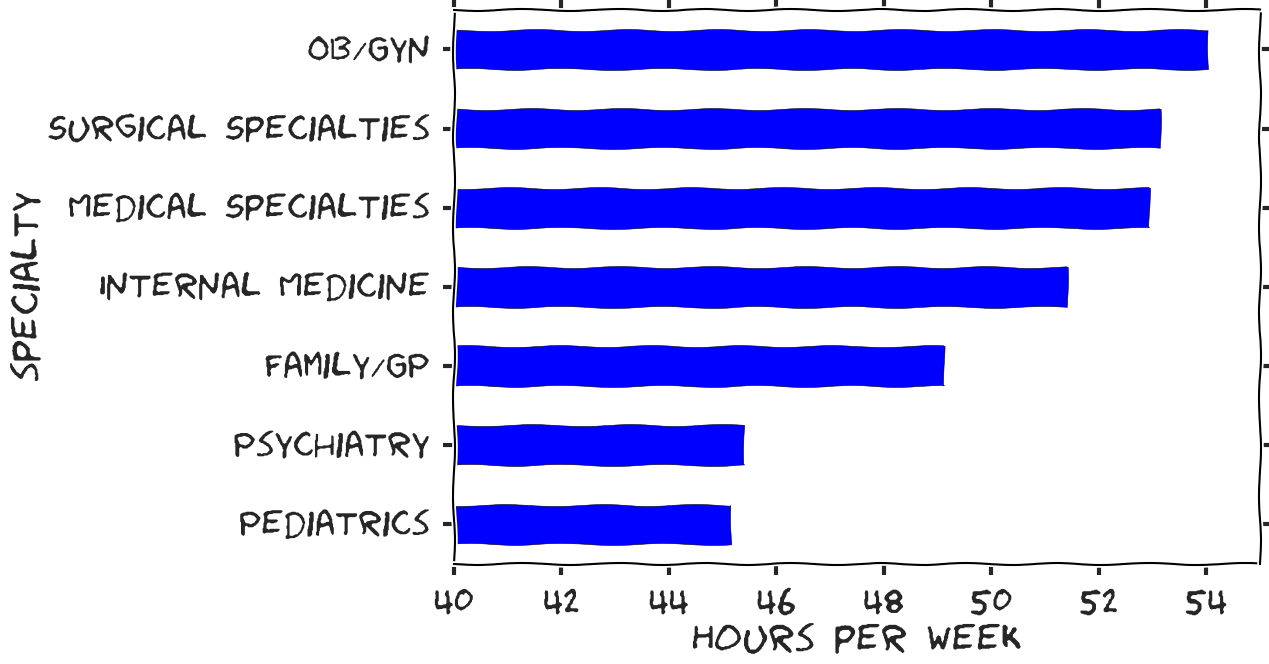

In [12]:
t.plot(kind='barh')
plt.axis(xmin=40, xmax=55)
plt.xlabel('Hours per week');

In [13]:
# data for TMI Table

df.groupby(['specialty', 'age']).apply(weighted_mean, col='hours_per_week').unstack()

age,35,40,45,50,55,60,65,70
specialty,,,,,,,,
Family/GP,49.029503,49.852861,47.803897,50.422358,50.606196,50.540345,48.293078,39.070012
Internal Medicine,50.550691,50.177222,51.515659,51.942768,54.536029,55.024481,44.989574,42.805989
Medical Specialties,51.410380,52.243088,53.597584,54.178722,54.635510,54.118655,49.248778,44.945831
Ob/Gyn,56.151629,53.334290,54.763139,59.427891,53.638445,51.704740,49.370244,43.178834
Pediatrics,42.854305,46.969763,43.167246,44.767633,47.889718,47.902158,49.556399,35.434198
Psychiatry,45.561658,46.151880,42.146848,46.423071,49.081273,46.191960,43.506246,41.233853
Surgical Specialties,57.612821,55.378400,54.084978,56.140275,56.285006,50.221415,46.763023,40.326713
